In [1]:
# Import the libraries we will be using
import os
import numpy as np
import pandas as pd
import math
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image

%matplotlib inline

In [36]:
def Decision_Tree_Image(decision_tree, feature_names, name="temp"):
    # Export our decision tree to graphviz format
    #dot_file = tree.export_graphviz(decision_tree.tree_, out_file='images/' + name + '.dot', feature_names=feature_names)
    with open("images/temp.dot", 'w') as f:
        export_graphviz(decision_tree.tree_, out_file=f, feature_names=feature_names)

    # Call graphviz to make an image file from our decision tree
    os.system("dot -Tpng images/" + name + ".dot -o images/" + name + ".png")
    
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')

# A function to plot the data
def Plot_Data(data, v1, v2, tv):
    # Make the plot square
    plt.rcParams['figure.figsize'] = [12.0, 8.0]
    
    # Color
    color = ["red" if x == 0 else "blue" for x in data[tv]]
    
    # Plot and label
    plt.scatter(data[v1], data[v2], c=color, s=50)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim([min(data[v1]) - 1, max(data[v1]) + 1])
    plt.ylim([min(data[v2]) - .05, max(data[v2]) + .05])
    
def Decision_Surface(x, y, model, cell_size=.01):
    # Get blob sizes for shading
    x = (min(x), max(x))
    y = (min(y), max(y))
    x_step = (x[1] - x[0]) * cell_size
    y_step = (y[1] - y[0]) * cell_size

    # Create blobs
    x_values = []
    y_values = []
    
    for i in np.arange(x[0], x[1], x_step):
        for j in np.arange(y[0], y[1], y_step):
            y_values.append(float(i))
            x_values.append(float(j))
    
    data_blob = pd.DataFrame({"x": x_values, "y": y_values})

    # Predict the blob labels
    label= decision_tree.predict(data_blob)
    
    # Color and plot them
    color = ["red" if l == 0 else "blue" for l in label]
    plt.scatter(data_blob['y'], data_blob['x'], marker='o', edgecolor='black', linewidth='0', c=color, alpha=0.3)
    
    # Get the raw decision tree rules
    decision_tree_raw = []
    for feature, left_c, right_c, threshold, value in zip(decision_tree.tree_.feature, 
                                                          decision_tree.tree_.children_left, 
                                                          decision_tree.tree_.children_right, 
                                                          decision_tree.tree_.threshold, 
                                                          decision_tree.tree_.value):
        decision_tree_raw.append([feature, left_c, right_c, threshold, value])

    # Plot the data
    Plot_Data(df, "weight", "displacement", "type")

    # Used for formatting the boundry lines
    currentAxis = plt.gca()
    line_color = "black"
    line_width = 3

    # For each rule
    for row in decision_tree_raw:
        feature, left_c, right_c, threshold, value = row

        if threshold != -2:
            if feature == 0:
                plt.plot([20, 100], [threshold, threshold], c=line_color, linewidth=line_width)
            else:
                plt.plot([threshold, threshold], [0, 5], c=line_color, linewidth=line_width)

    plt.xlim([min(x) - 1, max(x) + 1])
    plt.ylim([min(y) - .05, max(y) + .05])
    plt.show()

In [37]:
#Read the csv file
df = pd.read_csv('mpg.csv')

In [38]:
# Convert categorical feature “maker” into multiple dummy variables 
df_maker = pd.get_dummies(df['maker'])

# Join the dummy variables to the main dataframe
df = pd.concat([df, df_maker], axis=1)
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,maker,America,Asia,Europe
0,Bad,8,350,150,4699,14.5,74,America,1,0,0
1,Bad,8,400,170,4746,12.0,71,America,1,0,0
2,Bad,8,400,175,4385,12.0,72,America,1,0,0
3,Bad,6,250,72,3158,19.5,75,America,1,0,0
4,Bad,8,304,150,3892,12.5,72,America,1,0,0
5,Bad,8,350,145,4440,14.0,75,America,1,0,0
6,Bad,6,250,105,3897,18.5,75,America,1,0,0
7,Bad,6,163,133,3410,15.8,78,Asia,0,1,0
8,Bad,8,260,110,4060,19.0,77,America,1,0,0
9,Bad,8,305,130,3840,15.4,79,America,1,0,0


In [40]:
# Set “Good” and “Okay” as 1, and “Bad” as 0 and add a column called "type"
df["type"] = df.apply(lambda x: 0 if x["mpg"] == "Bad" else 1, axis=1)

# Set "type" as target
target_name = df.type
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,maker,America,Asia,Europe,type
0,Bad,8,350,150,4699,14.5,74,America,1,0,0,0
1,Bad,8,400,170,4746,12.0,71,America,1,0,0,0
2,Bad,8,400,175,4385,12.0,72,America,1,0,0,0
3,Bad,6,250,72,3158,19.5,75,America,1,0,0,0
4,Bad,8,304,150,3892,12.5,72,America,1,0,0,0
5,Bad,8,350,145,4440,14.0,75,America,1,0,0,0
6,Bad,6,250,105,3897,18.5,75,America,1,0,0,0
7,Bad,6,163,133,3410,15.8,78,Asia,0,1,0,0
8,Bad,8,260,110,4060,19.0,77,America,1,0,0,0
9,Bad,8,305,130,3840,15.4,79,America,1,0,0,0


In [41]:
def entropy(target):
    # Get the number of users
    n = len(target)
    # Count how frequently each unique value occurs
    counts = np.bincount(target).astype(float)
    # Initialize entropy
    entropy = 0
    # If the split is perfect, return 0
    if len(counts) <= 1 or 0 in counts:
        return entropy
    # Otherwise, for each possible value, update entropy
    for count in counts:
        entropy += math.log(count/n, len(counts)) * count/n
    # Return entropy
    return -1 * entropy

def information_gain(feature, threshold, target):
    # Dealing with numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Cut the feature vector on the threshold
    feature = (feature < threshold)
    # Initialize information gain with the parent entropy
    ig = entropy(target)
    # For both sides of the threshold, update information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
        ig -= count/len(feature) * entropy(target[feature == level])
    # Return information gain
    return ig

# Best threshold for all the features and also the information gain
def best_threshold(feature):
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in df[feature]:
        ig = information_gain(df[feature], threshold, np.array(target_name))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "For %s, the maximum IG = %.3f and it occured by splitting on %.4f." % (feature, maximum_ig, maximum_threshold)

# Find the top 3 most informative features and their IG and threshold
print best_threshold("displacement")
print best_threshold("horsepower")
print best_threshold("weight")
print best_threshold("acceleration")

For displacement, the maximum IG = 0.482 and it occured by splitting on 163.0000.
For horsepower, the maximum IG = 0.370 and it occured by splitting on 105.0000.
For weight, the maximum IG = 0.542 and it occured by splitting on 3158.0000.
For acceleration, the maximum IG = 0.087 and it occured by splitting on 13.0000.


We see that the top 3 informative features are weight, then displacement followed by horsepower

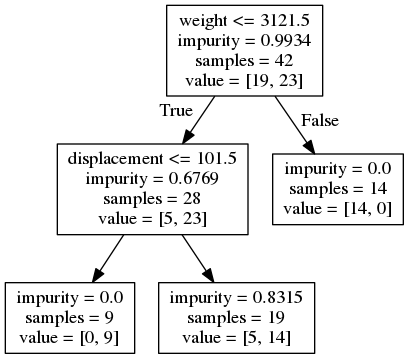

In [43]:
# Build a decision tree model on this data set
decision_tree = DecisionTreeClassifier(max_depth=2, criterion="entropy")
decision_tree.fit(X, Y)
Decision_Tree_Image(decision_tree, X.columns)

In [44]:
X = df[["weight", "displacement", "horsepower"]]
Y = df["type"]

# Try different values of max_depth and find which one is the most accurate.
for i in range (1, 11):
    decision_tree = DecisionTreeClassifier(max_depth=i, criterion="entropy")
    decision_tree.fit(X, Y)
    print "With depth = %i Accuracy = %.3f" % (i, metrics.accuracy_score(decision_tree.predict(X), Y))
    
print "Maximum Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X), Y))

With depth = 1 Accuracy = 0.881
With depth = 2 Accuracy = 0.881
With depth = 3 Accuracy = 0.905
With depth = 4 Accuracy = 0.929
With depth = 5 Accuracy = 0.952
With depth = 6 Accuracy = 0.952
With depth = 7 Accuracy = 0.952
With depth = 8 Accuracy = 0.952
With depth = 9 Accuracy = 0.952
With depth = 10 Accuracy = 0.952
Maximum Accuracy = 0.952


We see that the accuracy reaches 0.952 and remains constant for increasing values of depth

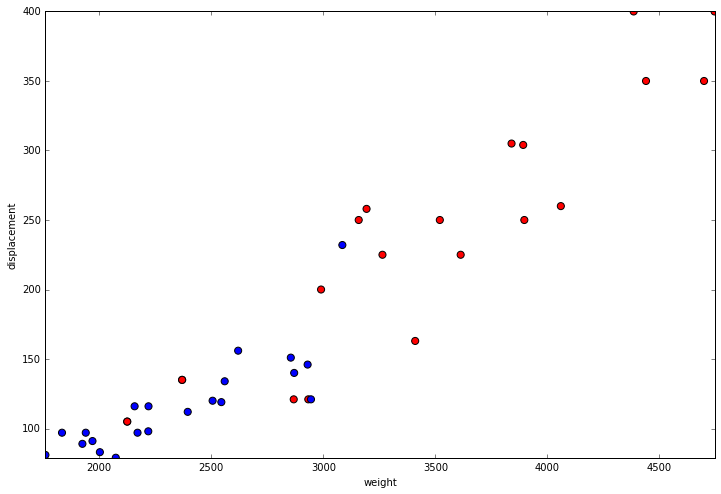

In [45]:
Plot_Data(df, "weight", "displacement", "type")

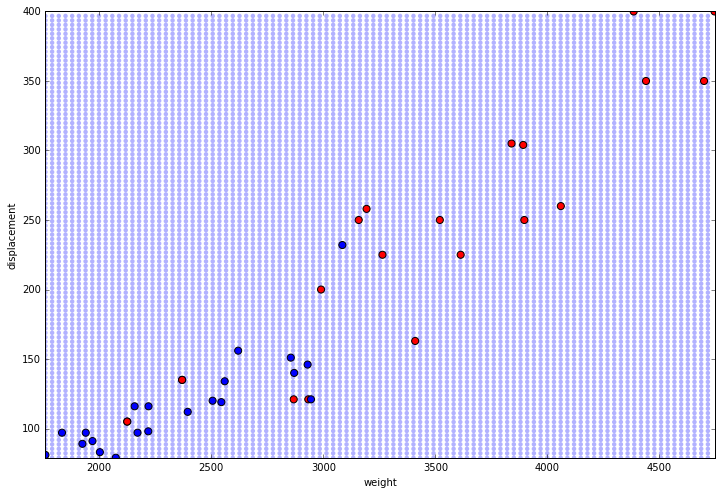

In [46]:
# Plot a decision surface with weight and displacement
X = df[["weight", "displacement"]]
decision_tree = DecisionTreeClassifier(max_depth=1, criterion="entropy")
decision_tree.fit(X, Y)
Decision_Surface(df['weight'], df['displacement'], decision_tree)